
## <font color=green>Spark Funds Investment Analysis Assignment - Solution</font>
##### By : <font color=green>Nihit Patel</font>



## Objectives:
Spark Funds is an asset management company.It wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.


In [1]:
#Importing the necessary python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math

%matplotlib inline
sns.set()

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning 1
* Load the companies and rounds data into two data frames and name them `companies` and `rounds2` respectively.
* Used encoding = `ANSI`
    

In [3]:
#Loading the companies.csv and rounds2.csv files into dataframes companies and rounds2 respectively:

companies = pd.read_csv('companies.csv',encoding='ANSI')
rounds2 = pd.read_csv("rounds2.csv",encoding='ANSI')

In [4]:
# Looking at top 5 rows of companies dataframes

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
# Looking at top 5 rows of rounds2 dataframes

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies.shape

(66368, 10)

In [7]:
rounds2.shape

(114949, 6)

#### How many unique companies are present in rounds2?
* Coverting `'company_permalink'` to LOWER case and then applying nunique() function

In [8]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
print("No. of unique Companies in rounds2 : ",rounds2["company_permalink"].nunique())

No. of unique Companies in rounds2 :  66368


#### How many unique companies are present in companies?
* Coverting `'permalink'` to LOWER case and then applying nunique() function

In [9]:
companies.permalink = companies.permalink.str.lower()
print("No. of unique Companies in companies : ",companies.permalink.nunique())

No. of unique Companies in companies :  66368


#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
* checking if a column contains all unique values with is_unique

In [10]:
for i in list(companies.columns) :
    if companies[i].is_unique :
        print("'" + i + "' can be used as Unique Key")

'permalink' can be used as Unique Key


#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
* checking if all values of company_permalink column of rounds2 are in permalink column of companies

In [11]:
temp_var = len(rounds2[~rounds2["company_permalink"].isin(companies.permalink)])
if temp_var == 0 :
    print("N")
else : 
    print("Y")

N


#### Merging companies and rounds2 dataframes to form master_frame

In [12]:
master_frame = pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame.shape

(114949, 16)

In [13]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [14]:
master_frame[["company_permalink","permalink"]].head(5)

,company_permalink,permalink
0,/organization/-fame,/organization/-fame
1,/organization/-qounter,/organization/-qounter
2,/organization/-qounter,/organization/-qounter
3,/organization/-the-one-of-them-inc-,/organization/-the-one-of-them-inc-
4,/organization/0-6-com,/organization/0-6-com


## <font color='green'>Data Cleaning</font>

#### 1. Droping duplicate column : `'permalink'` from master_frame

In [15]:
master_frame = master_frame.drop('permalink', axis=1)

2. Treating Missing values in Columns
    - Calculated percentage of missing values in each column
    - Based on percentage of missing values in each column, we can decide if we need to delete or Impute the columns/rows


In [16]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

#### Inference from above output


* `'funding_round_code'` column has ~73% and `'founded_at'` date column has ~18% of values missing. So let's remove these columns.


* We can also delete the rows where `'raised_amount_usd'` is Null as these rows will not contribute to our analysis


* Not dropping other columns as they have less than 10% of missing values

In [17]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.dropna(subset = ['raised_amount_usd'])

In [18]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

* We can also drop columns `'homepage_url, state_code, region and city'` as they do not bring any value for our analysis. Hence removing these columns as well.

In [19]:
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

In [20]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
dtype: float64

* We can ignore the null values of `'category_list & country_code'` as removing those rows will affect our analysis and also lead to loss of important data. 

##### Now we are ready to go further with our analysis.


# Checkpoint 2: Funding Type Analysis

* As we need to analyse only 4 funding funding types, removing entries of other funding types from master_frame


In [21]:
master_frame = master_frame[master_frame.funding_round_type.isin(["venture","seed","angel","private_equity"])]

* Finding out mean funding amount for `venture`, `seed`, `angel` and `private equity type`

In [22]:
pd.options.display.float_format = '{:.2f}'.format
avg_amt = pd.DataFrame(master_frame.groupby(["funding_round_type"])["raised_amount_usd"].mean().sort_values()).reset_index()
avg_amt

,funding_round_type,raised_amount_usd
0,seed,719818.00
1,angel,958694.47
2,venture,11748949.13
3,private_equity,73308593.03


In [23]:
avg_amt["raised_amount_usd"] = avg_amt["raised_amount_usd"].apply(lambda x: str(round(x/1000000,2)) + ' M')
avg_amt.rename(columns={"funding_round_type" : "Round Type","raised_amount_usd" : "Average Amount raised"},inplace=True)
avg_amt

,Round Type,Average Amount raised
0,seed,0.72 M
1,angel,0.96 M
2,venture,11.75 M
3,private_equity,73.31 M


#### Inference from above output

- As per constraint of Spark Funds, they wants to invest between 5 to 15 million USD per round of investment. So `'VENTURE'` funding will be the most appropriate for them

In [24]:
tot_amt = pd.DataFrame(master_frame.groupby(["funding_round_type"])["raised_amount_usd"].sum().sort_values()).reset_index()
tot_amt["raised_amount_usd"] = tot_amt["raised_amount_usd"].apply(lambda x: str(round(x/1000000000,2)) + ' B')
tot_amt.rename(columns={"funding_round_type" : "Round Type","raised_amount_usd" : "Total Amount raised"},inplace=True)
tot_amt

,Round Type,Total Amount raised
0,angel,4.66 B
1,seed,16.99 B
2,private_equity,141.93 B
3,venture,590.13 B


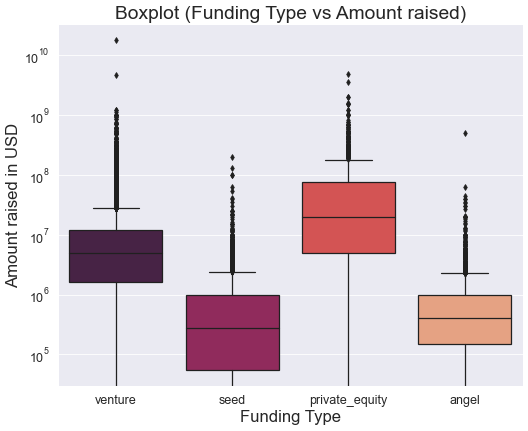

In [25]:
plt.figure(figsize=(10,8),dpi=60)

b = sns.boxplot(x='funding_round_type', y='raised_amount_usd', palette = "rocket", data=master_frame)
b.tick_params(labelsize=15)
b.axes.set_title("Boxplot (Funding Type vs Amount raised)",fontsize=23)
b.set_xlabel("Funding Type",fontsize=20)
b.set_ylabel("Amount raised in USD",fontsize=20)

plt.yscale('log')
plt.show()

#### Filtering Data further

* Filtering out data only for funnding type `'VENTURE'`

In [26]:
# creating a copy of master_frame for plotting of charts in Checkpoint 6
original_master_frame = master_frame
master_frame = master_frame[master_frame.funding_round_type.isin(["venture"])]

In [27]:
master_frame.shape

(50228, 9)


# Checkpoint 3: Country Analysis

#### <font color=green>Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.</font> <br>


1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the `'VENTURE'` investment type)


2. For the `'VENTURE'` investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)


In [28]:
top9 = pd.DataFrame(master_frame.groupby(["country_code"])["raised_amount_usd"].sum()).sort_values(by='raised_amount_usd',ascending=False)[:9]
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3363676611.00


### Identify the top three English-speaking countries in the data frame top9.

In [29]:
non_eng_country = ["CHN","FRA","DEU","JPN"]

temp_top9 = top9.copy()
temp_top9["raised_amount_usd"] = temp_top9["raised_amount_usd"].apply(lambda x: str(round(x/1000000000,2))+" B")
temp_top9["English Speaking"] = temp_top9["country_code"].apply(lambda x: "No" if x in non_eng_country else "Yes")
temp_top9.rename(columns={"country_code" : "Country Code","raised_amount_usd" : "Total Amount raised"},inplace=True)
temp_top9

,Country Code,Total Amount raised,English Speaking
0,USA,422.51 B,Yes
1,CHN,39.84 B,No
2,GBR,20.25 B,Yes
3,IND,14.39 B,Yes
4,CAN,9.58 B,Yes
5,FRA,7.26 B,No
6,ISR,6.91 B,Yes
7,DEU,6.35 B,No
8,JPN,3.36 B,No


In [30]:
temp_top9[temp_top9["English Speaking"] == 'Yes'][:3]

,Country Code,Total Amount raised,English Speaking
0,USA,422.51 B,Yes
2,GBR,20.25 B,Yes
3,IND,14.39 B,Yes


In [31]:
top3 = list(temp_top9[temp_top9["English Speaking"] == 'Yes'][:3]["Country Code"])
print("Top 3 English Speaking Countries : " + ", ".join(top3))

Top 3 English Speaking Countries : USA, GBR, IND




# Checkpoint 4: Sector Analysis 1


1. Extract the primary sector of each category list from the category_list column


In [32]:
master_frame["primary_sector"] = master_frame["category_list"].apply(lambda x: x if pd.isna(x) else str(x).split('|')[0])
master_frame["primary_sector"] = master_frame["primary_sector"].str.lower()


2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [33]:
mapping = pd.read_csv("mapping.csv")
mapping["category_list"] = mapping["category_list"].str.lower()
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1


#### <font color=green>Cleaning mapping dataframe</font>

1. Replace `'0'` in category_list with `'na'`
2. Using `'melt'` function to map `'category_list'` to corresponding `'Main Sector'` with `'1'` in values column

In [34]:
mapping.category_list = mapping.category_list.apply(lambda x: str(x).replace('0','na'))
mapping = mapping.melt(id_vars="category_list",var_name="main_sector")
mapping = mapping[mapping.value == 1].reset_index()
mapping.drop(columns={'value','index'},inplace=True)
#mapping = mapping[~(mapping.main_sector == 'Blanks')]
mapping.rename(columns={'category_list':'primary_sector'}, inplace=True)
mapping

,primary_sector,main_sector
0,adventure travel,Automotive & Sports
1,aerospace,Automotive & Sports
2,auto,Automotive & Sports
3,automated kiosk,Automotive & Sports
4,automotive,Automotive & Sports
...,...,...
683,social recruiting,"Social, Finance, Analytics, Advertising"
684,social television,"Social, Finance, Analytics, Advertising"
685,social travel,"Social, Finance, Analytics, Advertising"
686,stock exchanges,"Social, Finance, Analytics, Advertising"


In [35]:
#pd.merge(venture_frame,sector_mapping,how='inner',left_on='primary_sector',right_on='category_list')
master_frame = pd.merge(master_frame,mapping,how='left',on='primary_sector')

In [36]:
master_frame[["primary_sector","main_sector"]]

,primary_sector,main_sector
0,media,Entertainment
1,apps,"News, Search and Messaging"
2,curated web,"News, Search and Messaging"
3,biotechnology,Cleantech / Semiconductors
4,analytics,"Social, Finance, Analytics, Advertising"
...,...,...
50223,biotechnology,Cleantech / Semiconductors
50224,e-commerce,Others
50225,biotechnology,Cleantech / Semiconductors
50226,biotechnology,Cleantech / Semiconductors



    
# Checkpoint 5: Sector Analysis 2


#### Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type `'VENTURE'` and investments range of 5-15 M USD).


#### <font color=green>Create three separate data frames D1, D2 and D3 for each of the three countries (USA, GBR, IND) for venture FT</font>

In [37]:
D1 = master_frame[(master_frame.country_code=='USA') & (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
6,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
7,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging"
33,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.00,128 Technology,Service Providers|Technology,operating,USA,service providers,Others
37,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.00,1366 Technologies,Manufacturing,operating,USA,manufacturing,Manufacturing
38,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.00,1366 Technologies,Manufacturing,operating,USA,manufacturing,Manufacturing


In [38]:
D2 = master_frame[(master_frame.country_code=='GBR') & (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
161,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,"Social, Finance, Analytics, Advertising"
357,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,Entertainment
358,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,Entertainment
387,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
388,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment


In [39]:
D3 = master_frame[(master_frame.country_code=='IND') & (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,Entertainment
84,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21Diamonds,E-Commerce,operating,IND,e-commerce,Others
423,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.00,A LITTLE WORLD,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
1217,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.00,Adlabs Imagica,Entertainment|Tourism,operating,IND,entertainment,Entertainment
1658,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.00,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,finance,"Social, Finance, Analytics, Advertising"


* Using the three data frames, we can calculate the `'total number of investments'` and the `'total amount of investments'` in each main sector for each of the three countries.

In [40]:
#D1.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])
print("Sectors in USA as per Total Amount of Investment")
temp_D1 = D1.groupby('main_sector').agg(Total_Investments=('raised_amount_usd', 'sum'), No_of_Investments=('raised_amount_usd', 'count')).reset_index().sort_values(by=["Total_Investments"],ascending=False).reset_index()
temp_D1.drop(columns=["index"],inplace=True)
temp_D1

Sectors in USA as per Total Amount of Investment


,main_sector,Total_Investments,No_of_Investments
0,Others,26321007002.00,2950
1,"Social, Finance, Analytics, Advertising",23807376964.00,2714
2,Cleantech / Semiconductors,21633430822.00,2350
3,"News, Search and Messaging",13971567428.00,1583
4,Health,8211859357.00,909
5,Manufacturing,7258553378.00,799
6,Entertainment,5099197982.00,591
7,Automotive & Sports,1454104361.00,167


In [41]:
#D3.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])
print("Sectors in Breat Britain as per Total Amount of Investment")
temp_D2 = D2.groupby('main_sector').agg(Total_Investments=('raised_amount_usd', 'sum'), No_of_Investments=('raised_amount_usd', 'count')).reset_index().sort_values(by=["Total_Investments"],ascending=False).reset_index()
temp_D2.drop(columns=["index"],inplace=True)
temp_D2

Sectors in Breat Britain as per Total Amount of Investment


,main_sector,Total_Investments,No_of_Investments
0,Others,1283624289.00,147
1,Cleantech / Semiconductors,1163990056.00,130
2,"Social, Finance, Analytics, Advertising",1089404014.00,133
3,"News, Search and Messaging",615746235.00,73
4,Entertainment,482784687.00,56
5,Manufacturing,361940335.00,42
6,Health,214537510.00,24
7,Automotive & Sports,167051565.00,16


In [42]:
#D3.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])
print("Sectors in India as per Total Amount of Investment")
temp_D3 = D3.groupby('main_sector').agg(Total_Investments=('raised_amount_usd', 'sum'), No_of_Investments=('raised_amount_usd', 'count')).reset_index().sort_values(by=["Total_Investments"],ascending=False).reset_index()
temp_D3.drop(columns=["index"],inplace=True)
temp_D3

Sectors in India as per Total Amount of Investment


,main_sector,Total_Investments,No_of_Investments
0,Others,1013409507.00,110
1,"Social, Finance, Analytics, Advertising",550549550.00,60
2,"News, Search and Messaging",433834545.00,52
3,Entertainment,280830000.00,33
4,Manufacturing,200900000.00,21
5,Health,167740000.00,19
6,Cleantech / Semiconductors,165380000.00,20
7,Automotive & Sports,136900000.00,13


### Table 5.1 : Sector-wise Investment Analysis

1. Total number of investments (count)

In [43]:
print("No. of Investments in USA : ",len(D1))
print("No. of Investments in GBR : ",len(D2))
print("No. of Investments in IND : ",len(D3))

No. of Investments in USA :  12150
No. of Investments in GBR :  628
No. of Investments in IND :  330


2. Total amount of investment (USD)

In [44]:
print("Total Amount of Investment in USA : ",D1.raised_amount_usd.sum())
print("Total Amount of Investment in GBR : ",D2.raised_amount_usd.sum())
print("Total Amount of Investment in IND : ",D3.raised_amount_usd.sum())

Total Amount of Investment in USA :  108531347515.0
Total Amount of Investment in GBR :  5436843539.0
Total Amount of Investment in IND :  2976543602.0


3-8. Top 3 Sectors Names and Number of investments (based on count of investments)

In [45]:
print("In USA : \n")
print(D1.main_sector.value_counts()[:3])
print("\n\nIn GBR : \n")
print(D2.main_sector.value_counts()[:3])
print("\n\nIn IND : \n")
print(D3.main_sector.value_counts()[:3])

In USA : 

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: main_sector, dtype: int64


In GBR : 

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: main_sector, dtype: int64


In IND : 

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64


9. For the top sector count-wise (point 3), which company received the highest investment?

In [46]:
#pd.pivot_table(data=D1[D1.main_sector=='Others'],index="name",values="raised_amount_usd",aggfunc=np.sum).sort_values(by="raised_amount_usd",ascending=False)

print("For USA")
D1[D1.main_sector=='Others'].groupby(["name"]).sum().sort_values(by=["raised_amount_usd"],ascending=False).head(1)


For USA


,raised_amount_usd
name,
Virtustream,64300000.00


In [47]:
print("For GBR")
D2[D2.main_sector=='Others'].groupby(["name"]).sum().sort_values(by=["raised_amount_usd"],ascending=False).head(1)


For GBR


,raised_amount_usd
name,
Electric Cloud,37000000.00


In [48]:
print("For IND")
D3[D3.main_sector=='Others'].groupby(["name"]).sum().sort_values(by=["raised_amount_usd"],ascending=False).head(1)


For IND


,raised_amount_usd
name,
FirstCry.com,39000000.00


10. For the second-best sector count-wise (point 4), which company received the highest investment

In [49]:
print("For USA")
D1[D1.main_sector=='Social, Finance, Analytics, Advertising'].groupby(["name"]).sum().sort_values(by=["raised_amount_usd"],ascending=False).head(1)

For USA


,raised_amount_usd
name,
SST Inc. (Formerly ShotSpotter),67933006.00


In [50]:
print("For GBR")
D2[D2.main_sector=='Social, Finance, Analytics, Advertising'].groupby(["name"]).sum().sort_values(by=["raised_amount_usd"],ascending=False).head(1)

For GBR


,raised_amount_usd
name,
Celltick Technologies,37500000.00


In [51]:
print("For IND")
D3[D3.main_sector=='Social, Finance, Analytics, Advertising'].groupby(["name"]).sum().sort_values(by=["raised_amount_usd"],ascending=False).head(1)

For IND


,raised_amount_usd
name,
Manthan Systems,50700000.00



# Checkpoint 6: Plots

### <font color=green>A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   </font>


1. Created two subplots as below:
* 1st is `pie` chart that shows `Distribution of Total Amount raised` <br>
* 2nd is `bar` chart that shows `Average Investment in each funding type`
        
#### Charts makes it very clear that `'Venture'` funding type is best suited for Spark Funds as it has average investment amount  between 5 to 15 Millions USD    

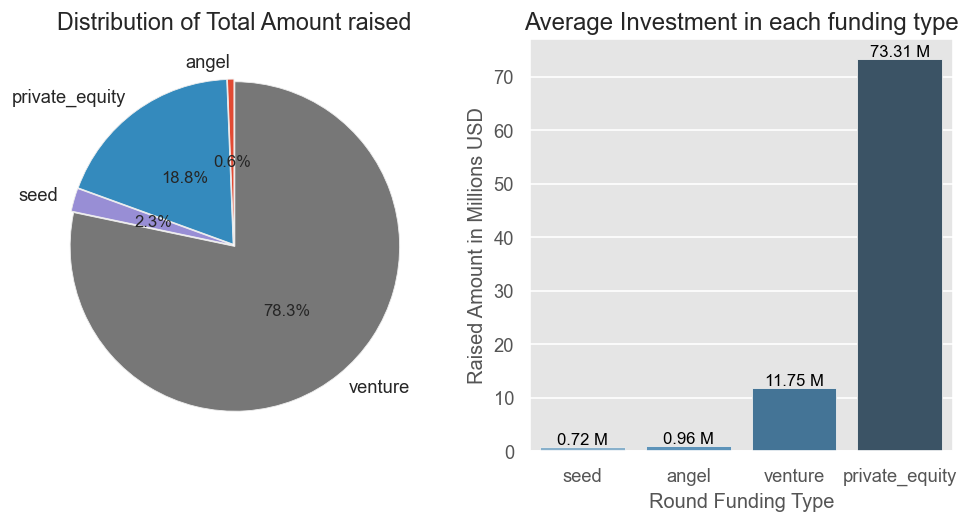

In [52]:
plt.figure(figsize=(10,10),dpi=120)
plt.style.use("ggplot")


plt.subplot(221)

# Preparing Data
pie_data = original_master_frame.groupby(["funding_round_type"])["raised_amount_usd"].sum()
labels = pie_data.keys()
## For Pie Chart
plt.pie(x=pie_data, autopct="%.1f%%", explode=[0.009]*4, labels=labels, pctdistance=0.5,startangle=90)
plt.title("Distribution of Total Amount raised", fontsize=14);


plt.subplot(222)

#Preparing Data
bar_data = original_master_frame.groupby(["funding_round_type"]).mean().sort_values(by=["raised_amount_usd"]).reset_index()
bar_data["raised_amount_usd"] = round(bar_data["raised_amount_usd"]/1000000,2)
# For Bar Chart
g = sns.barplot(data=bar_data, x="funding_round_type", y="raised_amount_usd",palette="Blues_d")
g.set(xlabel='Round Funding Type', ylabel='Raised Amount in Millions USD')
g.set_title('Average Investment in each funding type')
## For annotation
for index, row in bar_data.iterrows():
    g.text(row.name,row.raised_amount_usd+0.5, str(row.raised_amount_usd) + ' M', color='black', ha="center")

plt.show()

### <font color='green'>A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.</font>

* Plotted a `'Bar Chart'`

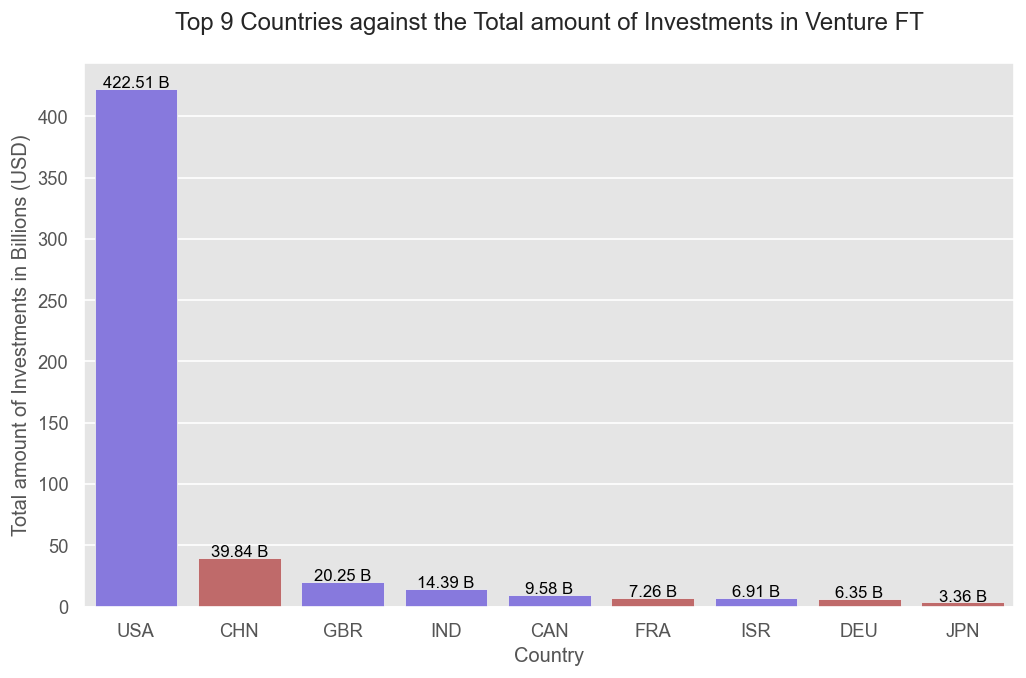

In [53]:
plt.figure(figsize=(10,6),dpi=120)
plt.style.use("ggplot")



bar_data = top9.reset_index()
bar_data["raised_amount_usd"] = round(bar_data["raised_amount_usd"]/1000000000,2)

clrs = ['indianred' if (x in ["CHN","FRA","DEU","JPN"]) else 'mediumslateblue' for x in bar_data["country_code"] ]
g = sns.barplot(data=bar_data, x="country_code", y="raised_amount_usd",palette=clrs)
g.set(xlabel='Country', ylabel='Total amount of Investments in Billions (USD)')
g.set_title('Top 9 Countries against the Total amount of Investments in Venture FT',pad=20)

## Annotating each bar with the corresponding value/number

for index, row in bar_data.iterrows():
    g.text(row.name,row.raised_amount_usd+(1), str(row.raised_amount_usd) + ' B', color='black', ha="center")


plt.show()

#### <font color='red'>NOTE : RED </font> color bar in above bar chart represents Non-English Speaking Countries

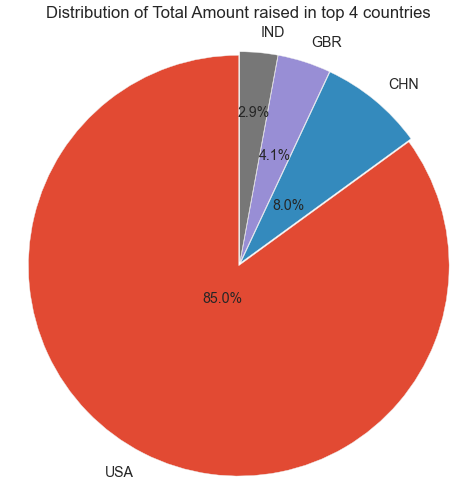

In [54]:
plt.figure(figsize=(10,10),dpi=60)

pie_data = list(round(top9.reset_index()["raised_amount_usd"][:4]/1000000000,2))

# Plotting Pie Chart, changing orientation of pie chart and annotating it 
labels = top9.reset_index()["country_code"][:4]
w,l,p = plt.pie(x=pie_data, autopct="%.1f%%", explode=[0.009]*4, labels=labels, pctdistance=0.9,startangle=90,textprops={'fontsize': 17})
plt.title("Distribution of Total Amount raised in top 4 countries", fontsize=20,pad=25);

pctdists = [.2, .4, .6, .8]

for t,d in zip(p, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))

plt.axis('equal')
plt.show()

### <font color='green'>A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen Venture FT). This plot clearly display the top 3 sectors each in USA, GBR and IND.</font>

In [55]:
#concating D1, D2 and D3 into D and only considering top 3 sectors in each dataframes
D = pd.concat([D1[D1.main_sector.isin(list(D1["main_sector"].value_counts()[:3].index))],D2[D2.main_sector.isin(list(D2["main_sector"].value_counts()[:3].index))],D3[D3.main_sector.isin(list(D3["main_sector"].value_counts()[:3].index))]],axis=0)

In [56]:
D_table = pd.DataFrame(D.groupby(["country_code","main_sector"])["raised_amount_usd"].count().sort_values(ascending=False).reset_index())
D_table.rename(columns={"raised_amount_usd":"Number of Investments","main_sector":"Top Sectors","country_code":"Country"},inplace=True)
D_table["Rank"] = np.array([1,2,3]*(len(D_table)//3))
D_table.set_index("Rank")

,Country,Top Sectors,Number of Investments
Rank,,,
1,USA,Others,2950
2,USA,"Social, Finance, Analytics, Advertising",2714
3,USA,Cleantech / Semiconductors,2350
1,GBR,Others,147
2,GBR,"Social, Finance, Analytics, Advertising",133
3,GBR,Cleantech / Semiconductors,130
1,IND,Others,110
2,IND,"Social, Finance, Analytics, Advertising",60
3,IND,"News, Search and Messaging",52


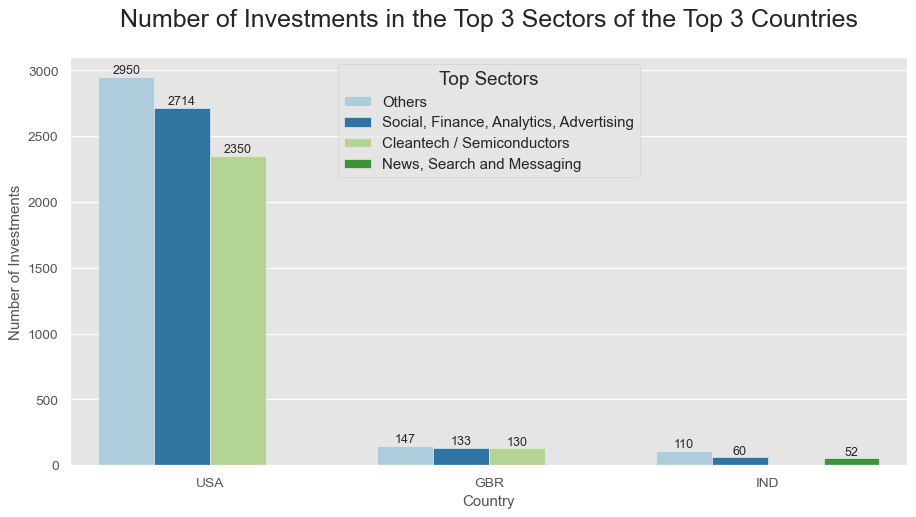

In [57]:
plt.figure(figsize=(12,6),dpi=90)

g = sns.barplot(data=D_table,x="Country",y="Number of Investments",hue="Top Sectors",palette = "Paired")

## Annotating Bar chart
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries", fontsize=20,pad=25);
plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='15') # for legend title
plt.show()